In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_csv("Life Expectancy Data.csv")

In [4]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [6]:
#Fixing column names
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [7]:
#as there are a lot of nunique values for country and there can hardly be any correlation       just drop it 
df.drop('Country',axis=1,inplace=True)

In [8]:
#dividing by object and non-object
df_num = df.select_dtypes(exclude=['object']).copy()
df_obj=df.select_dtypes(include=['object']).copy()

In [9]:
df_obj

,Status
0,Developing
1,Developing
2,Developing
3,Developing
4,Developing
...,...
2933,Developing
2934,Developing
2935,Developing
2936,Developing


In [10]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [11]:
#label encoding for ordinal
label_map={'Status':{'Developing':0,'Developed':1}}

In [12]:
df_obj.replace(label_map,inplace=True)

In [13]:
df_obj.dtypes

Status    int64
dtype: object

In [14]:
df_new = pd.concat([df_num,df_obj],axis=1)

In [15]:
df_new.dtypes

Year                                 int64
Life_expectancy                    float64
Adult_mortality                    float64
Infant_deaths                        int64
Alcohol                            float64
Percentage_expenditure             float64
HepatitisB                         float64
Measles                              int64
BMI                                float64
Under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness_1-19_years                float64
Thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
Status                               int64
dtype: object

In [16]:
df_new.isnull().sum()

Year                                 0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
Status                               0
dtype: int64

In [17]:
df_new.shape

(2938, 21)

In [18]:
#Remove rows with missing / NA values greater than 90%
df_new.dropna(axis=0, thresh=int(0.1*df_new.shape[1]))
df_new = df_new.loc[df_new.isnull().sum(axis=1)/df_new.shape[1] <= 0.1, :]

In [19]:
df_new.shape

(2666, 21)

In [20]:
#delete rows with 50% missing values
df_new = df_new[df_new.isnull().sum(axis=1) <=(df_new.shape[1] * 0.5) ]
df_new.columns

Index(['Year', 'Life_expectancy', 'Adult_mortality', 'Infant_deaths',
       'Alcohol', 'Percentage_expenditure', 'HepatitisB', 'Measles', 'BMI',
       'Under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'Status'],
      dtype='object')

In [21]:
#now that obj is handled we will go for filling missing value 
cat_col = df_new.columns[df_new.nunique() < 10]
con_col = df_new.columns[df_new.nunique() >= 10]

In [22]:
df_cat = df_new.loc[:,cat_col]
df_con = df_new.loc[:,con_col]
df_cat.fillna(df_cat.mode().iloc[0],inplace=True)
df_con.fillna(df_con.median(),inplace=True)

In [23]:
df_new = pd.concat([df_cat,df_con],axis=1)

In [24]:
(df_new.isnull().any()).unique()

array([False])

In [25]:
#Remove those columns which have same value in all rows(remove duplicates)
df_new.drop_duplicates(inplace=True)
df_new.shape

(2666, 21)

In [26]:
#Remove columns which have different values in all rows
for col in df.columns:
    if len(df[col].unique()) == df.shape[0]:
     print("col", col)
     df.drop(col,inplace=True,axis=1)


In [27]:
df_new

,Status,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,0,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,0,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,0,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Normalization

In [28]:
#divide train and test data
X=df_new.drop(['Life_expectancy'],axis=1)  
Y=df_new['Life_expectancy']             

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=7)

In [30]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

std_scaler.fit(X_train)

x_std_train = std_scaler.transform(X_train.values)
x_std_test = std_scaler.transform(X_test.values)

In [31]:
X_train = pd.DataFrame(x_std_train,columns=X_train.columns)
X_test = pd.DataFrame(x_std_test,columns=X_test.columns)

In [32]:
X_train.shape,X_test.shape

((2132, 20), (534, 20))

In [33]:
df_new.to_csv("cleaned_Life Expectancy.csv",index=False)

In [34]:
#~~~~~~~~~~~~~~~~~~~~~DATA IS CLEANED~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [35]:
df['Life_expectancy'].skew() #-ve left skewed ; +ve right skewed

-0.6386047358773552

In [36]:
def calc_limits_IQR(df_new, column):
    q1,q3 = df_new[column].quantile([0.25,0.75])
    iqr = q3 - q1
    min_val = q1 - (1.5 * iqr)               
    max_val = q3 + (1.5 * iqr)
    return min_val, max_val

In [37]:
for col in X_train.columns:
    min_val, max_val = calc_limits_IQR(X_train, col)
    X_train.loc[X_train[col] < min_val,col] = min_val
    X_train.loc[X_train[col] > max_val,col] = max_val


In [38]:
df_new.describe()

,Status,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,...,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2.666000e+03,2666.000000,2666.000000,2666.000000,2666.000000
mean,0.171418,2007.461740,69.435559,161.430608,29.783571,4.518323,811.885059,82.763691,2229.086272,38.437434,...,82.880720,5.869992,82.852588,1.781658,7030.058078,1.100932e+07,4.875994,4.917742,0.633426,12.108440
std,0.376944,4.537135,9.333125,122.974077,122.432687,3.923465,2072.660179,23.132080,10736.993966,19.820773,...,22.935901,2.312564,23.104064,5.270619,13793.978453,5.662574e+07,4.491206,4.583255,0.204430,3.206315
min,0.000000,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,0.000000,2004.000000,63.800000,72.250000,0.000000,0.970000,12.094505,82.000000,0.000000,19.300000,...,78.000000,4.340000,79.000000,0.100000,522.607672,3.291785e+05,1.600000,1.600000,0.501000,10.200000
50%,0.000000,2007.000000,72.200000,142.000000,3.000000,3.790000,90.522597,92.000000,14.000000,43.900000,...,93.000000,5.720000,93.000000,0.100000,1774.632915,1.382517e+06,3.300000,3.300000,0.681000,12.400000
75%,0.000000,2011.000000,75.500000,222.000000,19.000000,7.350000,510.300136,96.000000,329.000000,56.100000,...,97.000000,7.340000,97.000000,0.700000,5375.974433,5.418067e+06,7.200000,7.300000,0.780000,14.300000
max,1.000000,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,...,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [39]:
df_new.corr().head() 

,Status,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
Status,1.000000,-0.007683,0.476868,-0.296531,-0.108342,0.573687,0.486629,0.127853,-0.072058,0.296754,...,0.220374,0.257192,0.204675,-0.145150,0.478045,-0.037627,-0.358299,-0.356702,0.486133,0.528216
Year,-0.007683,1.000000,0.162274,-0.067588,-0.036550,-0.065449,0.038461,0.027540,-0.092836,0.086633,...,0.078441,0.068692,0.134379,-0.136615,0.093232,0.016178,-0.035915,-0.039488,0.221925,0.204922
Life_expectancy,0.476868,0.162274,1.000000,-0.678750,-0.180904,0.372346,0.402387,0.161266,-0.144664,0.564605,...,0.447645,0.180541,0.456882,-0.567705,0.451043,-0.032967,-0.466045,-0.460979,0.738869,0.759370
Adult_mortality,-0.296531,-0.067588,-0.678750,1.000000,0.063910,-0.166295,-0.248383,-0.111797,0.011178,-0.372560,...,-0.247181,-0.079845,-0.239088,0.533030,-0.286271,-0.002816,0.288589,0.295555,-0.455572,-0.444012
Infant_deaths,-0.108342,-0.036550,-0.180904,0.063910,1.000000,-0.102553,-0.085444,-0.163276,0.521616,-0.221271,...,-0.164820,-0.123517,-0.165280,0.018482,-0.102025,0.558957,0.468129,0.474340,-0.153226,-0.205475


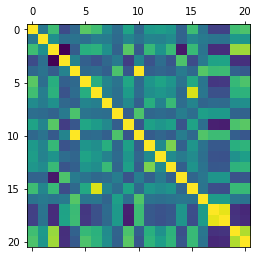

<Figure size 1440x864 with 0 Axes>

In [40]:
plt.matshow(df_new.corr())
plt.figure(figsize=(20,12))
plt.show()

In [41]:
corr = df_new.corr()
corr_target = abs(corr['Life_expectancy'])
print(df_new.columns[corr_target > 0.3][:-1])

Index(['Status', 'Life_expectancy', 'Adult_mortality', 'Alcohol',
       'Percentage_expenditure', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'GDP', 'Thinness_1-19_years', 'Thinness_5-9_years',
       'Income_composition_of_resources'],
      dtype='object')


In [42]:
X=df_new.drop(['Life_expectancy'],axis=1)  
Y=df_new['Life_expectancy']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                                                    test_size=0.30, random_state=7)

In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1) #0.01
lasso.fit(X_train, y_train)
lasso.coef_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15121.60952033403, tolerance: 16.52891529046088
  model = cd_fast.enet_coordinate_descent(


array([ 2.29692991e-01, -1.42913016e-02, -1.68841817e-02,  8.74267969e-02,
        2.93921012e-02,  8.58322541e-05, -1.63645698e-02, -1.72075508e-05,
        4.88003793e-02, -6.43832324e-02,  2.94006281e-02,  1.95979308e-02,
        3.37166467e-02, -4.80084321e-01,  6.15675435e-05, -1.86550969e-09,
       -6.99975238e-02, -0.00000000e+00,  1.15329829e+00,  1.02700472e+00])

In [45]:
len(lasso.coef_[abs(lasso.coef_)>0])

19

In [46]:
X_train=X_train.columns[abs(lasso.coef_)>0]

In [47]:
X=df_new[X_train]

In [48]:
X

,Status,Year,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Income_composition_of_resources,Schooling
0,0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,0,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,0,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,0,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,0,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,0,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,0,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,0,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8


In [49]:
df_new = pd.concat([X,Y],axis=1)

In [50]:
df_new

,Status,Year,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Income_composition_of_resources,Schooling,Life_expectancy
0,0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,65.0
1,0,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,59.9
2,0,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,59.9
3,0,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,59.5
4,0,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2,44.3
2934,0,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5,44.5
2935,0,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0,44.8
2936,0,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8,45.3


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, \
                                                    test_size=0.30, random_state=7)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [53]:
model_linear=LinearRegression().fit(X_train,Y_train)
model_dtree=DecisionTreeRegressor().fit(X_train,Y_train)

In [54]:
from sklearn.metrics import r2_score
pred_linear=model_linear.predict(X_test)
r2_score(Y_test,pred_linear)

0.8450039752688444

In [55]:
pred_dtree=model_dtree.predict(X_test)
r2_score(Y_test,pred_dtree)

0.9081953057216438

In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, pred_linear)
rmse_linear = mean_squared_error(Y_test, pred_linear) ** 0.5
rmse_linear

3.596198352511525

In [57]:
mean_squared_error(Y_test, pred_dtree)
rmse_dtree = mean_squared_error(Y_test, pred_dtree) ** 0.5
rmse_dtree

2.7676795334720383

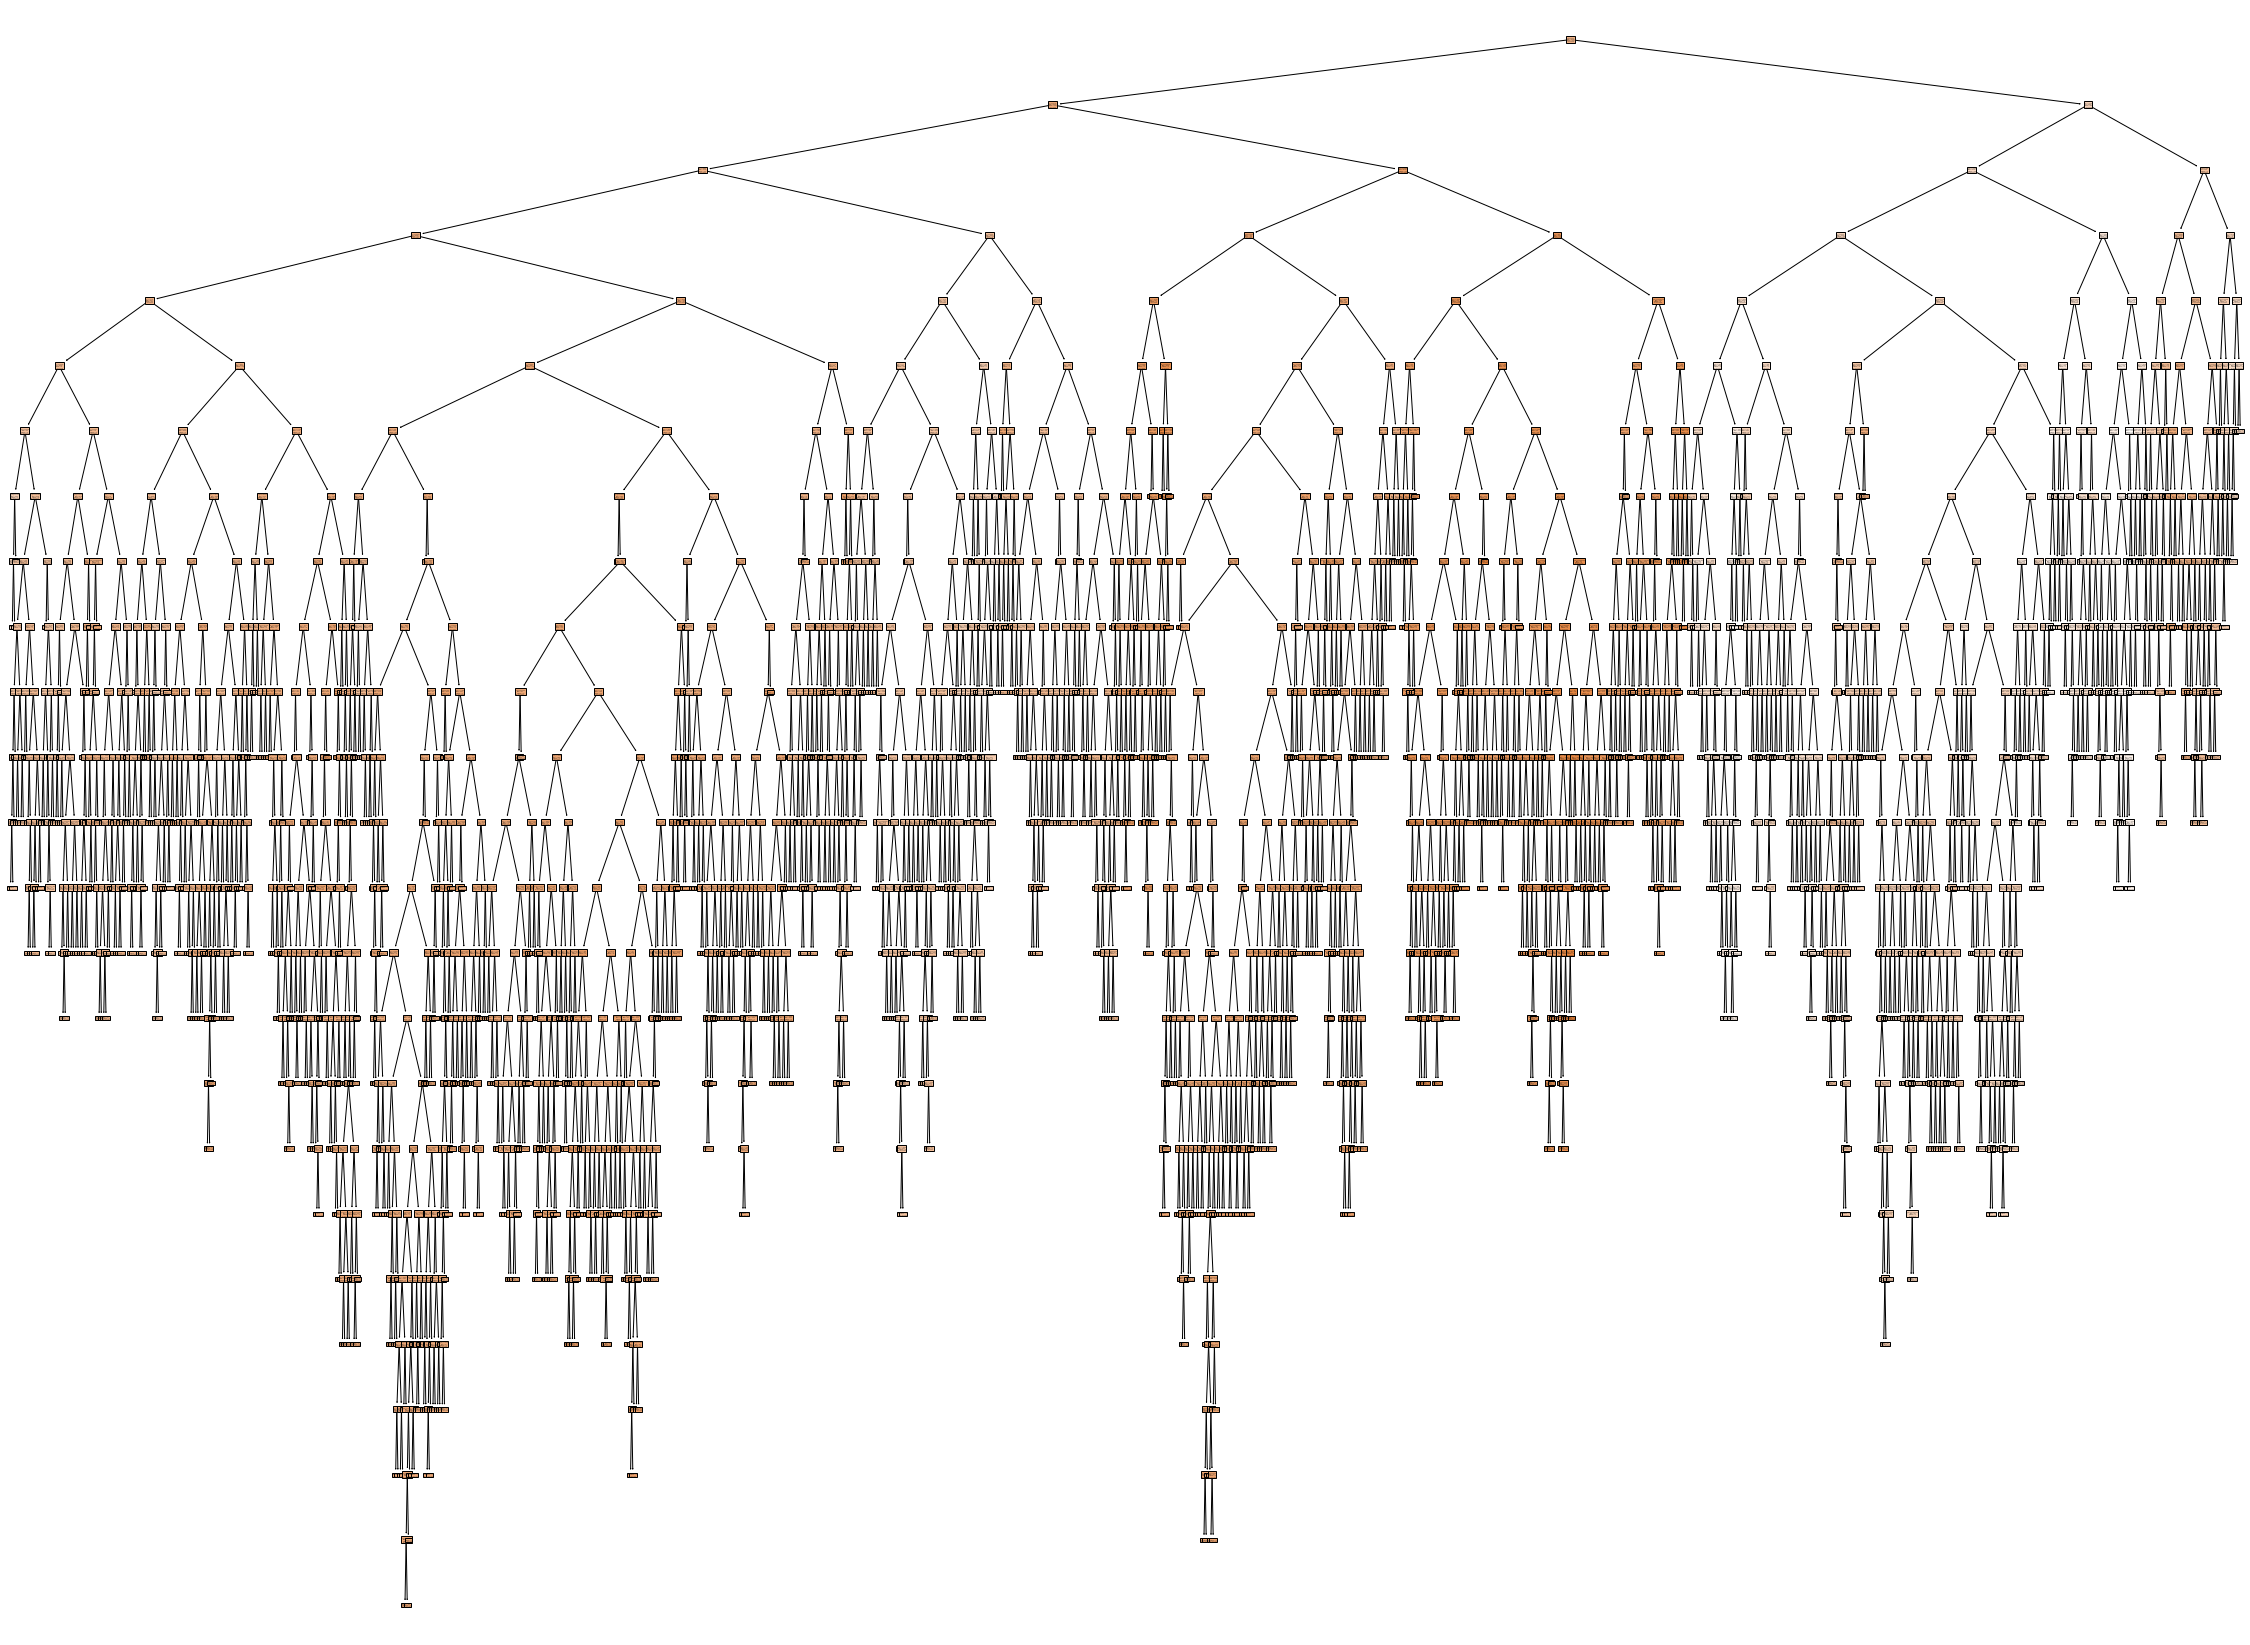

In [57]:
#dtree is best here
from sklearn import tree
from sklearn.tree import  plot_tree
plt.figure(figsize=(40,30))
#tree.plot_tree(model_tree)
plot_tree(model_dtree, filled=True)
plt.show()

In [58]:
s=pd.DataFrame()
g={}
for i in range(len(X.columns)):
    g[X.iloc[:,i].name]= input("please enter the "+X.iloc[:,i].name+"  ")
#status=> developing=0  developed=1

please enter the Status  1
please enter the Year  2011
please enter the Adult_mortality  8
please enter the Infant_deaths  1
please enter the Alcohol  0.01
please enter the Percentage_expenditure  10.9
please enter the HepatitisB  65
please enter the Measles  10
please enter the BMI  14.7
please enter the Under_five_deaths  1
please enter the Polio  6
please enter the Total_expenditure  8.7
please enter the Diphtheria  5
please enter the HIV/AIDS  0.1
please enter the GDP  4437.6
please enter the Population  2941
please enter the Thinness_1-19_years  2.3
please enter the Income_composition_of_resources  0.754
please enter the Schooling  14.2


In [59]:
g

{'Status': '1',
 'Year': '2011',
 'Adult_mortality': '8',
 'Infant_deaths': '1',
 'Alcohol': '0.01',
 'Percentage_expenditure': '10.9',
 'HepatitisB': '65',
 'Measles': '10',
 'BMI': '14.7',
 'Under_five_deaths': '1',
 'Polio': '6',
 'Total_expenditure': '8.7',
 'Diphtheria': '5',
 'HIV/AIDS': '0.1',
 'GDP': '4437.6',
 'Population': '2941',
 'Thinness_1-19_years': '2.3',
 'Income_composition_of_resources': '0.754',
 'Schooling': '14.2'}

In [60]:
#l=X.iloc[1].values
#m=l.reshape(-1, 1)

In [61]:
s=pd.DataFrame([g])

In [62]:
model_dtree.predict(s)

array([74.5])